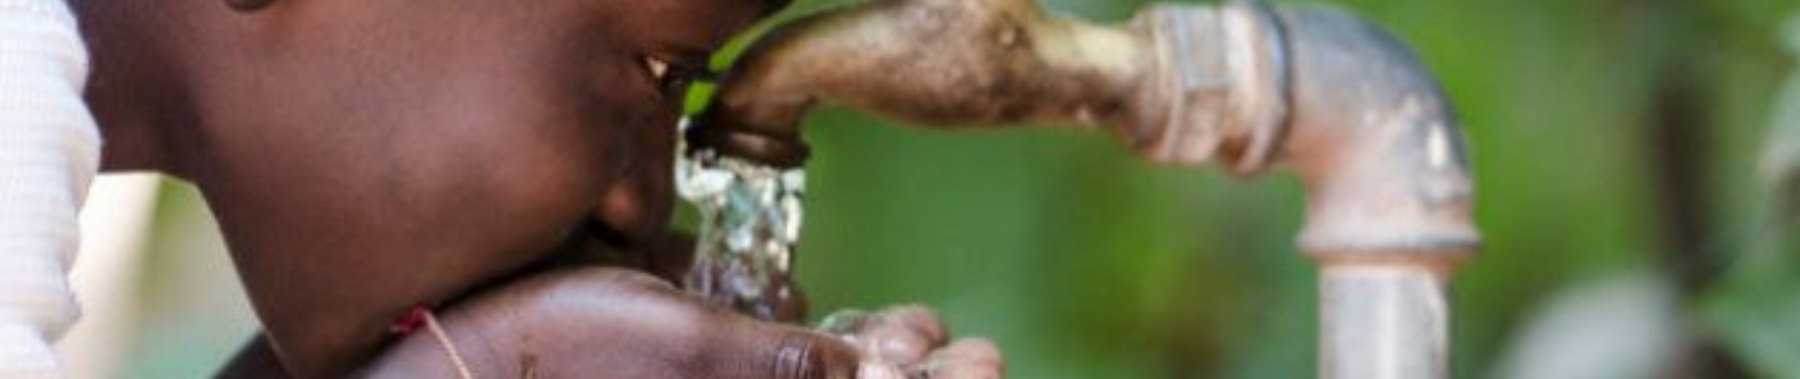

# <center> Валидация данных и оценка модели на примере датасета о качестве воды
    
### Контекст
Доступ к безопасной питьевой воде имеет важное значение для здоровья, является основным правом человека и компонентом эффективной политики охраны здоровья. Это важно как вопрос здравоохранения и развития на национальном, региональном и местном уровне. Было показано, что в некоторых регионах инвестиции в водоснабжение и санитарию могут принести чистую экономическую выгоду, поскольку сокращение неблагоприятных последствий для здоровья и затрат на здравоохранение перевешивает затраты на проведение мероприятий.
    
Датасет содержит показатели качества воды для 3276 различных водоемов. пригодность для питья воды оценивается по девяти признакам - их описания для удобства мы представим в виде таблицы.

|Признак|Описание|
|-|-|
|**ph**|PH является важным параметром при оценке кислотно-щелочного баланса воды. Это также индикатор кислотного или щелочного состояния воды. ВОЗ рекомендовала максимально допустимый предел pH от 6,5 до 8,5. Текущие диапазоны исследований составляют 6,52–6,83, что соответствует стандартам ВОЗ.|
|**Hardness**|Жесткость обусловлена в основном солями кальция и магния. Эти соли растворяются из геологических отложений, через которые проходит вода. Продолжительность контакта воды с материалом, вызывающим жесткость, помогает определить степень жесткости сырой воды. Первоначально жесткость определялась как способность воды осаждать мыло, вызванное кальцием и магнием.|
|**Solids**|Твердые вещества (Общее количество растворенных твердых веществ – TDS). Вода обладает способностью растворять широкий спектр неорганических и некоторых органических минералов или солей, таких как калий, кальций, натрий, бикарбонаты, хлориды, магний, сульфаты и т. д. Эти минералы придают воде нежелательный вкус и цвет. Это важный параметр для использования воды. Вода с высоким значением TDS указывает на высокую минерализацию воды. Желаемый предел TDS составляет 500 мг/л, а максимальный предел — 1000 мг/л, который предписан для питьевых целей.|
|**Chloramines**|Хлор и хлорамин являются основными дезинфицирующими средствами, используемыми в общественных системах водоснабжения. Хлорамины чаще всего образуются при добавлении аммиака к хлору для очистки питьевой воды. Уровни хлора до 4 миллиграммов на литр (мг/л или 4 части на миллион (ppm)) считаются безопасными в питьевой воде.|
|**Sulfate**|Сульфаты — это природные вещества, которые содержатся в минералах, почве и горных породах. Они присутствуют в атмосферном воздухе, грунтовых водах, растениях и продуктах питания. Основное коммерческое применение сульфата приходится на химическую промышленность. Концентрация сульфатов в морской воде составляет около 2700 миллиграммов на литр (мг/л). В большинстве источников пресной воды он колеблется от 3 до 30 мг/л, хотя в некоторых географических точках обнаруживаются гораздо более высокие концентрации (1000 мг/л).|
|**Conductivity**|Чистая вода не является хорошим проводником электрического тока, а скорее хорошим изолятором. Увеличение концентрации ионов увеличивает электропроводность воды. Обычно количество растворенных твердых веществ в воде определяет электропроводность. Электропроводность (EC) фактически измеряет ионный процесс раствора, который позволяет ему передавать ток. По стандартам ВОЗ значение ЕС не должно превышать 400 мкСм/см.|
|**Organic_carbon**|Общий органический углерод (TOC) в исходных водах поступает из разлагающихся природных органических веществ (NOM), а также из синтетических источников. TOC — это мера общего количества углерода в органических соединениях в чистой воде. По данным Агентства по охране окружающей среды США < 2 мг/л ТОС в очищенной/питьевой воде и < 4 мг/л в исходной воде, используемой для очистки.|
|**Trihalomethanes**|ТГМ – это химические вещества, которые можно обнаружить в воде, обработанной хлором. Концентрация ТГМ в питьевой воде варьируется в зависимости от уровня органических веществ в воде, количества хлора, необходимого для очистки воды, и температуры очищаемой воды. Уровни ТГМ до 80 ppm считаются безопасными в питьевой воде.|
|**Turbidity**|Мутность воды зависит от количества твердых веществ, находящихся во взвешенном состоянии. Это мера светоизлучающих свойств воды, и этот тест используется для определения качества сброса отходов по отношению к коллоидным веществам. Среднее значение мутности, полученное для Wondo Genet Campus (0,98 NTU), ниже рекомендованного ВОЗ значения 5,00 NTU.|
|**Potability**|Указывает, безопасна ли вода для потребления человеком, где 1 означает, что она пригодна для питья, а 0 означает, что она не пригодна для питья.|

**В этой работе мы будем решать задачу классификации: классифицировать воду на пригодную  и не пригодную для питья на основе её химического состава. Заодно рассмотрим методы валидации данных (*hold-out*, *k-fold*, *leave-one-out*) и оценки качества моделей (pr-кривая, кривая обучения).**

Оригинальный датасет доступен по [ссылке](https://www.kaggle.com/datasets/adityakadiwal/water-potability).

Переходим к работе с данными. Импортируем модули, которые нам понадобятся:

In [2]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации
plt.style.use('seaborn-v0_8') # стиль отрисовки seaborn
%matplotlib inline
 
from sklearn import metrics # метрики
from sklearn import model_selection # методы разделения и валидации
from sklearn import linear_model # линейные модели
from sklearn import tree # деревья решений


Прочитаем данные о собранных образцах воды и выведем первые пять строк таблицы:

In [2]:
water_data = pd.read_csv('data/water_potability.zip')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Большинство столбцов таблицы являются числовыми. Целевой признак — Potability (пригодность для питья): 1 — вода пригодна, 0 — вода не пригодна.

В данных есть пропуски. Выведем информацию о них в процентном соотношении:

In [3]:
water_data.isnull().mean() * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Итак, у нас отсутствует около 15 % информации о кислотности воды (ph), около 24 % — о содержании сульфатов (Sulfate) и около 5 % — о тригалометанах (Trihalomethanes). Мы знаем, что пропуски — непосильная ноша для большинства моделей машинного обучения. Их необходимо обработать.

Заполним пропуски медианным значением в признаке в зависимости от класса воды (Potability). Для этого сгруппируем данные по признаку Potability, посчитаем медиану в каждой группе, а затем отправим результат в метод fillna():

In [4]:
# Заполняем пропуски.
water_data['ph'] = water_data['ph'].fillna(
    water_data.groupby('Potability')['ph'].transform('median')
)
water_data['Sulfate'] = water_data['Sulfate'].fillna(
    water_data.groupby('Potability')['Sulfate'].transform('median')
)
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(
    water_data.groupby('Potability')['Trihalomethanes'].transform('median')
)

Убедимся в отсутствии пропусков:

In [5]:
water_data.isnull().mean() * 100

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

Теперь рассмотрим **основные методы валидации данных** на примере нашего датасета.

## <center> HOLD-OUT валидация

Теперь проблема пропусков устранена. Разделим набор данных на матрицу наблюдений X и вектор правильных ответов y:

In [6]:
X = water_data.drop('Potability', axis=1)
y = water_data['Potability']

Если мы используем двухкомпонентный подход (разбиваем выборку на тренировочную и валидационную, она же тестовая), то всё очень просто: нам лишь нужно вызвать функцию train_test_split() и передать в неё матрицу наблюдений X и вектор-столбец с правильными ответами y.

Разделим выборку в соотношении 80/20 (test_size=0.2), в качестве значения параметра random_state по традиции возьмём число 42.

Функция должна вернуть четыре массива:
  * таблицу X с обучающими примерами,
  * таблицу X с примерами для валидации,
  * столбец y с ответами на обучающие примеры,
  * столбец y с ответами на валидационные примеры.

In [7]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

Проверим размеры полученных выборок:

In [8]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))

Train shape: (2620, 9)
Valid shape: (656, 9)


Итак, 2620 образцов воды являются обучающими — в них модель будет искать закономерности и подбирать внутренние параметры, а 656 являются валидационными — на них мы будем производить контроль качества.

Далее нам останется только обучить модель на тренировочной выборке (X_train, y_train) и рассчитать метрики на валидационной выборке (X_valid, y_valid).

В качестве модели будем использовать дерево решений с максимальной глубиной 7, энтропией в качестве критерия информативности, минимальное число объектов в листе дерева — 5.

После обучения сделаем предсказание для каждой из выборок и рассчитаем метрику. В качестве метрики для простоты возьмём долю правильных ответов — accuracy.

In [9]:
# Создаём модель.
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42 # генератор случайных чисел  
)
# Обучаем модель на тренировочной выборке.
model.fit(X_train, y_train)
# Делаем предсказание для каждой из выборок.
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
# Выводим значения метрик.
print('Train hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('Valid hold-out accuracy: {:.2f}'.format(metrics.accuracy_score(y_valid, y_valid_pred)))

Train hold-out accuracy: 0.82
Valid hold-out accuracy: 0.77


Если же мы используем трёхкомпонентный подход (разбиваем выборку на тренировочную, валидационную и отдельную тестовую), нам понадобится чуть больше кода. Придется применить функцию train_test_split() дважды: сначала разобьём исходный набор на тренировочный и валидационный в соотношении 80/20, затем разобьём валидационный набор на валидационный и тестовый в соотношении 50/50. В итоге наша выборка будет разбита в соотношении 80/10/10:

In [10]:
#разбиваем исходную выборку на тренировочную и валидационную в соотношении 80/20
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)
#разбиваем валидационную выборку на валидационную и тестовую в соотношении 50/50
X_valid, X_test, y_valid, y_test = model_selection.train_test_split(
    X_valid, y_valid, test_size=0.5, random_state=42
)

Выводим размерности:

In [11]:
print('Train shape: {}'.format(X_train.shape))
print('Valid shape: {}'.format(X_valid.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2620, 9)
Valid shape: (328, 9)
Test shape: (328, 9)


В этом случае мы будем обучаться на 2620 примерах, 328 будем использовать для промежуточного контроля и подбора внешних параметров и ещё 328 будут нашим контрольным рубежом — их мы будем использовать для принятия финального решения о качестве модели.

## <center> K-FOLD валидация

У объекта класса KFold есть метод split(). В данный метод необходимо передать матрицу наблюдений X и вектор-столбец ответов y — метод вернёт генератор, который позволит получать индексы тренировочной и валидационной выборок, сгенерированных по методу k-fold.

Будем использовать двухкомпонентный контроль, то есть подавать в кросс-валидацию весь доступный набор данных без предварительного выделения тестовой выборки.

Создадим объект KFold для кросс-валидации с пятью фолдами, остальные параметры оставим по умолчанию. Затем организуем цикл for для получения элементов из генератора, созданного с помощью метода split(). На каждой итерации в переменных train_index и valid_index будут находиться индексы текущей тренировочной и валидационной выборок соответственно.

В цикле будем:
  * выделять строки таблицы, относящиеся к текущим тренировочной и валидационной выборкам, в отдельные таблицы;
  * обучать дерево решений;
  * делать предсказания для текущих тренировочной и валидационной выборок;
  * рассчитывать метрику accuracy на текущих выборках и заносить её значение в список.

In [12]:
# Создаём модель.
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42 # генератор случайных чисел  
)
 
# Создаём объект кросс-валидатора KFold.
kf = model_selection.KFold(n_splits=5)
# Создаём список для хранения тренировочных и валидационных метрик.
train_metrics = []
val_metrics = []
# Организуем цикл для кросс-валидации (используем весь набор данных).
# train_index — индексы тренировочной выборки
# valid_index — индексы валидационной выборки
for train_index, valid_index in kf.split(X, y): 
    # Создаём тренировочную и валидационную выборку, обращаясь по текущим индексам.
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    # Обучаем дерево решений на тренировочной выборке.
    model.fit(X_train, y_train)
    # Делаем предсказание для каждой из выборок.
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    # Рассчитываем метрику и заносим её в список.
    train_metrics.append(metrics.accuracy_score(y_train, y_train_pred))
    val_metrics.append(metrics.accuracy_score(y_valid, y_valid_pred))

Выведем содержимое массивов train_metrics и val_metrics:

In [13]:
print(train_metrics)
print(val_metrics)

[0.8034351145038168, 0.8168637924456315, 0.8027470431133156, 0.8267836703548264, 0.8157191911484166]
[0.7957317073170732, 0.7053435114503817, 0.7358778625954199, 0.7282442748091603, 0.732824427480916]


В каждом из выведенных списков содержится по пять значений метрики accuracy, вычисленных на тренировочном и валидационном фолдах кросс-валидации. Для агрегированной оценки рассчитаем среднее значение метрик:

In [14]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(train_metrics)))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(val_metrics)))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


Неужели нет в sklearn чего-то, что могло бы упростить нам жизнь и сократить всю эту писанину?

Оказывается, весь приведённый выше код действительно можно заменить специальной функцией для кросс-валидации — cross_validate() из модуля model_selection. Она организует процедуру кросс-валидации и расчёт метрик.

In [15]:
# Создаём модель.
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42 # генератор случайных чисел  
)
 
# Создаём объект кросс-валидатора KFold.
kf = model_selection.KFold(n_splits=5)
 
# Считаем метрики на кросс-валидации k-fold.
cv_metrics = model_selection.cross_validate(
    estimator=model, # модель
    X=X, # матрица наблюдений X
    y=y, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='accuracy', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.01400065, 0.01299977, 0.01199961, 0.01203227, 0.01296687]),
 'score_time': array([0.        , 0.00100017, 0.00099993, 0.00099993, 0.00099993]),
 'test_score': array([0.79573171, 0.70534351, 0.73587786, 0.72824427, 0.73282443]),
 'train_score': array([0.80343511, 0.81686379, 0.80274704, 0.82678367, 0.81571919])}

В массивах, хранящихся по ключам train_score и test_score, содержится по пять значений метрики accuracy, полученных на тренировочных и валидационных фолдах соответственно на каждой итерации кросс-валидации. Рассчитаем среднее и сравним его с результатом, полученным ранее:

In [16]:
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.81
Valid k-fold mean accuracy: 0.74


## <center> LEAVE-ONE-OUT валидация
    
В библиотеке sklearn метод leave-one-out реализован в классе LeaveOneOut. Параметров инициализации у данного класса нет.

Объект класса LeaveOneOut также можно передать в функцию cross_validate() для получения метрик на каждом из примеров. В случае с метрикой accuracy список будет состоять из 0 и 1 (0 — модель не угадала класс на отложенном примере, 1 — модель угадала класс на отложенном примере).

Так как датасет у нас довольно большой (более трёх тысяч образцов воды), алгоритм кросс-валидации leave-one-out будет выполняться очень долго. Для экономии времени выполнения кода будем использовать первые 500 наблюдений из исходной таблицы.

In [17]:
# Создаём модель.
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42 # генератор случайных чисел  
)
 
# Создаём кросс-валидатор LeaveOneOut.
loo = model_selection.LeaveOneOut()
 
# Считаем метрики на кросс-валидации leave-one-out.
cv_metrics = model_selection.cross_validate(
    estimator=model, # модель
    X=X.iloc[:500], # матрица наблюдений X
    y=y.iloc[:500], # вектор ответов y
    cv=loo, # кросс-валидатор
    scoring='accuracy', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean accuracy: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean accuracy: 0.95
Valid k-fold mean accuracy: 0.90


#  <center> Дисбаланс выборки
    
Проблемы, которые могут возникнуть из-за несбалансированной выборки:
  * При разбиении несбалансированной выборки на тренировочную/валидационную/тестовую увеличивается шанс попадания в одну из них     объектов только одного класса, из-за чего оценка качества модели может быть необъективной.
  * Нельзя использовать метрики, не учитывающие размеры классов, такие как accuracy.
  * Стандартные методы ML, такие как дерево решений и логистическая регрессия, имеют тенденцию игнорировать класс меньшинства.

Рассмотрим влияние дисбаланса на примере датасета о качестве воды. Посмотрим на соотношения классов внутри датасета:

0    0.60989
1    0.39011
Name: Potability, dtype: float64

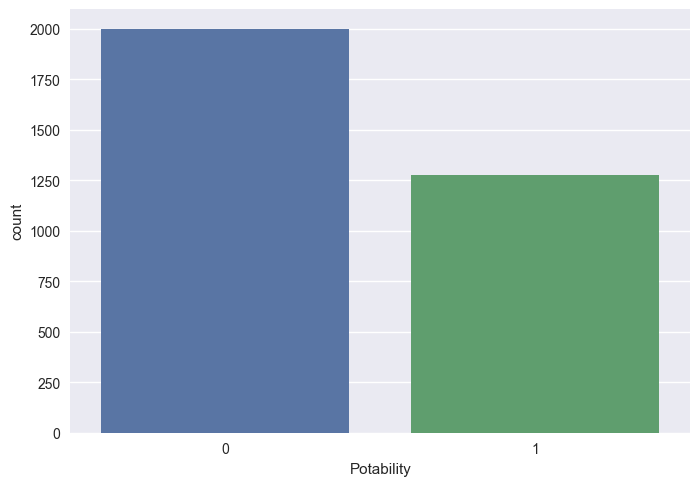

In [18]:
display(water_data['Potability'].value_counts(normalize=True))
sns.countplot(data=water_data, x='Potability');

Как видим, размеры классов не одинаковы даже приблизительно.

## <center> СТРАТИФИЦИРОВАННОЕ РАЗБИЕНИЕ

Для того чтобы снизить влияние дисбаланса классов при разбиении выборки, в наборе данных используется специальный тип разбиения, который называется **стратифицированным (stratified)**. Данное разбиение предполагает, что наблюдения, принадлежащие каждому из классов, гарантированно попадут в каждый из наборов данных в одинаковой пропорции.

Давайте на примере рассмотрим, как производить стратифицированное разбиение. Начнём с простого разделения hold-out, которое мы проводим с помощью функции train_test_split(). Для начала проведём обычное случайное разбиение на тренировочную и валидационную выборку (в соотношении 80/20) без стратификации:

In [19]:
X, y = water_data.drop('Potability', axis=1), water_data['Potability']
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=1
)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
0    0.620229
1    0.379771
Name: Potability, dtype: float64
Valid:
0    0.568598
1    0.431402
Name: Potability, dtype: float64


Мы видим, что соотношения классов в тренировочной выборке — 62/38, а в тестовой — 57/43. Попробуем сбалансировать соотношения.

Для стратифицированного разбиения в функции train_test_split() нужно задать параметр stratify, в который следует передать столбец с метками классов, на основе которого будет производиться балансировка. Это будет столбец с правильными ответами y.

In [20]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=1
)
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
0    0.609924
1    0.390076
Name: Potability, dtype: float64
Valid:
0    0.609756
1    0.390244
Name: Potability, dtype: float64


Теперь в каждом из наборов данных одинаковые соотношения классов — 61/39. Метрики, полученные при одинаковых соотношениях на выборках, будут более объективными.

Но что насчёт кросс-валидации? Как организовать разбиение по методу k-fold и получить одинаковые соотношения классов?

Для этого, оказывается, вместо KFold используется кросс-валидатор StratifiedKFold. Принцип работы с ним аналогичен, только, в отличие от KFold, StratifiedKFold будет разбивать выборку на части таким образом, чтобы в тренировочных и валидационных фолдах соотношения классов были приблизительно одинаковыми.

Напишем код, который организует стратифицированное k-fold-разбиение на три фолда, и выведем соотношения классов в каждой из выборок:

In [21]:
skf = model_selection.StratifiedKFold(
    n_splits=3, shuffle=True, random_state=42
)
for train_index, valid_index in skf.split(X, y): 
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_valid, y_valid = X.iloc[valid_index], y.iloc[valid_index]
    print('Train:\n', y_train.value_counts(normalize=True), sep='')
    print('Valid:\n', y_valid.value_counts(normalize=True), sep='')
    print('-'*40)

Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------
Train:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
Valid:
0    0.60989
1    0.39011
Name: Potability, dtype: float64
----------------------------------------


Видно, что соотношения классов в тренировочной и валидационной выборках в каждом разбиении примерно одинаковы — 61/39.

Объект класса StratifiedKFold может быть также использован в функции cross_validate().

### Пример

Сгенерируем некоторую задачу классификации и отрисуем диаграмму рассеяния с цветовой группировкой по классам:

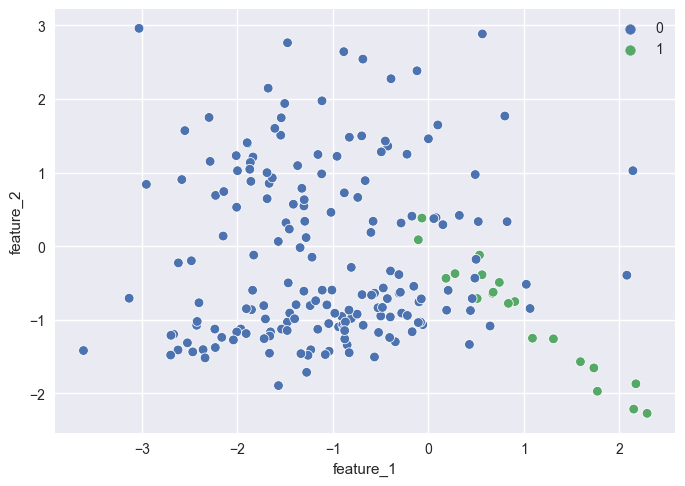

In [3]:
from sklearn import datasets
Xd, yd = datasets.make_classification(
    n_samples=200, # количество объектов
    n_features=2, # количество признаков
    n_informative=2, # количество информативных признаков
    n_redundant=0, # количество неинформативных признаков
    n_classes=2, # количество классов
    weights=[1, 0.2], # пропорции классов
    random_state=40 # генератор случайных чисел
)
Xd = pd.DataFrame(Xd, columns=['feature_1', 'feature_2'])
yd = pd.Series(yd)
sns.scatterplot(x=Xd['feature_1'], y=Xd['feature_2'], hue=yd);

Разобьем исходный набор данных на тренировочный и валидационный со стратификацией по классам в соотношении 80/20.

Построим диаграммы рассеяния с цветовой группировкой по классам для валидационной выборки.

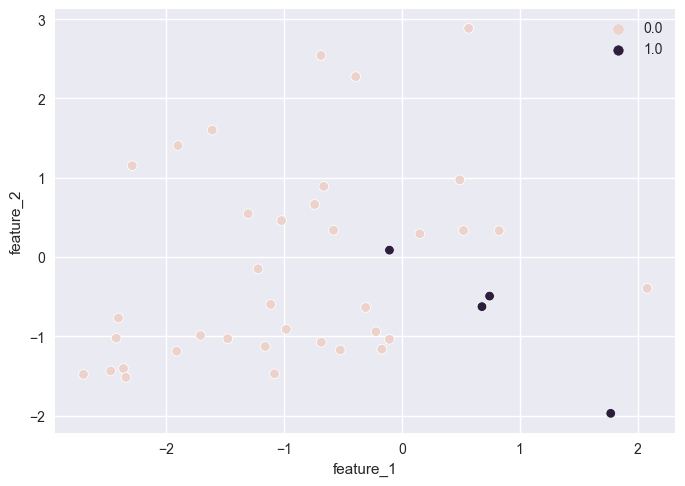

In [4]:
Xd_train, Xd_valid, yd_train, yd_valid = model_selection.train_test_split(
    Xd, yd, stratify=yd, test_size=0.2, random_state=42
)
sns.scatterplot(x=Xd['feature_1'], y=Xd['feature_2'], hue=yd_valid);

## <center> ВЫБОР МЕТРИК В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ

Посмотрим на примере, насколько важен выбор метрики в случае дисбаланса выборки.

Разобьём выборку на тренировочную и валидационную в соотношении 80/20, используя стратифицированное разбиение, затем обучим модель дерева решений, сделаем предсказание для каждой из выборок и сформируем отчёт о метриках на валидационной выборке с помощью функции classification_report().

In [37]:
#Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=7, #максимальная глубина
    min_samples_leaf=5, #минимальное число объектов в листе
    random_state=42, #генератор случайных чисел
)
#Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
#Выводим значения метрик
print(metrics.classification_report(y_valid, y_valid_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       400
           1       0.81      0.55      0.65       256

    accuracy                           0.77       656
   macro avg       0.78      0.73      0.74       656
weighted avg       0.78      0.77      0.76       656



Из отчёта о метриках классификации видно, что для валидационной выборки метрика *accuracy* составляет 0.77, что, в принципе, является довольно хорошим результатом. Однако если мы посмотрим на метрики *recall* и *f1-score* для каждого из классов в отдельности, мы увидим, что метрики для класса 0 значительно выше, чем метрики для класса 1.

 * *Precision* для класса 1 составляет 0.81, то есть из всех образцов воды, причисленных моделью к классу пригодных для питья, 81 % действительно являются таковыми.
 * *Recall* для класса 1 составляет 0.55, то есть из всех образцов в действительности пригодной для питья воды модель посчитала пригодными лишь 55 %, а остальные 45 % посчитала непригодными.
 * $F_1$-мера — среднее гармоническое между *precision* и *recall* — составила 0.65 для класса 1 и 0.83 — для класса 0. Разница довольно далека от нуля, а значит построенная нами модель больше контролируется на образцах воды, непригодных для питья, и обладает плохой различающей способностью.

Однако мы не смогли бы выявить этот факт, если бы ориентировались только на метрику *accuracy*. Одной из причин такого результата является дисбаланс классов: образцов непригодной для питья попросту больше, чем пригодных для питья.

### Пример

Воспользуемся сгенерированными ранее тренировочными и валидационными выборками. Обучим модель логистической регрессии на тренировочной выборке (оставив все параметры по умолчанию). Сделаем предсказание для валидационной выборки и рассчитаем метрики классификации.

In [33]:
# Создаем объект класса логистическая регрессия.
log_reg = linear_model.LogisticRegression()
# Обучаем модель.
log_reg.fit(Xd_train, yd_train)
# Делаем предсказание для валидационной выборки.
yd_valid_pred = log_reg.predict(Xd_valid)
# Выводим отчет о метриках классификации.
print(metrics.classification_report(yd_valid, yd_valid_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.50      0.25      0.33         4

    accuracy                           0.90        40
   macro avg       0.71      0.61      0.64        40
weighted avg       0.88      0.90      0.88        40



Здесь мы сумели еще лучше продемонстрировать важность выбора метрики в условиях дисбаланса классов: *accuracy* у нас чудосное, но модель не умеет отыскивать объекты класса 1.

Воспользуемся функцией plot_probabilities_2d(), которую мы написали в одной из предыдущих работ, для того, чтобы построить разделяющую поверхность логистической регрессии.

Передадим в её аргументы матрицу наблюдений X, вектор ответов y и обученную логистическую регрессию.

In [26]:
# Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    # Генерируем координатную сетку из всех возможных значений для признаков
    # Glucose изменяется от x1_min = 44 до x2_max = 199, 
    # BMI — от x2_min = 18.2 до x2_max = 67.1
    # Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    # Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    # Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    # Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    # Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    # Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    # Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    # Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    # Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    # Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    # Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    # Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

D:\programm\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


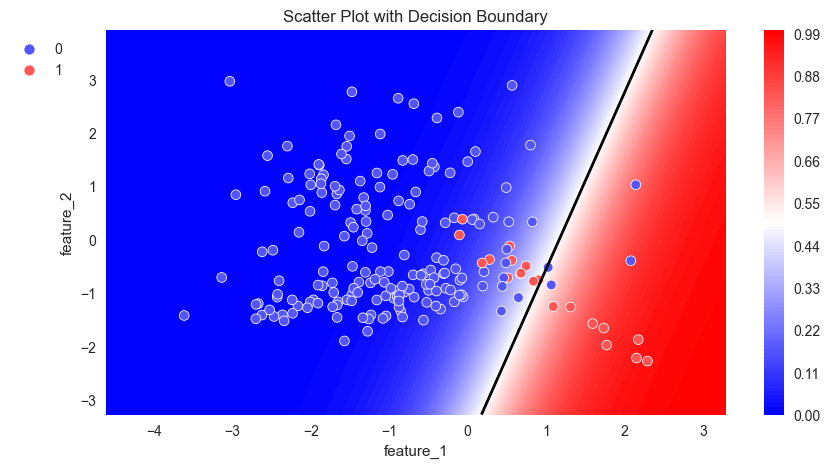

In [41]:
plot_probabilities_2d(Xd, yd, log_reg)

## <center> ПОСТРОЕНИЕ МОДЕЛИ В УСЛОВИЯХ ДИСБАЛАНСА КЛАССОВ
    
Итак, мы посмотрели, как дисбаланс выборки может оказывать влияние на способность модели находить класс меньшинства. Но как с этим бороться?

Существует несколько способов уменьшить влияние дисбаланса на обучение модели:

 * Взвешивание объектов. В функцию ошибки добавляется штраф, прямо пропорциональный количеству объектов каждого класса. Это очень похоже на регуляризацию.
 * Выбор порога вероятности. Этот подход мы с вами тоже уже использовали ранее. Он заключается в том, что мы подбираем такой порог вероятности (по умолчанию он равен 0.5 во всех моделях), при котором на валидационной выборке максимизируется целевая метрика (например, -score).
 * Сэмплирование (sampling) — перебалансировка выборки искусственным путём:
     * oversampling — искусственное увеличение количества объектов миноритарного класса;
     * undersampling — сокращение количества объектов мажоритарного класса.
      
### ВЗВЕШИВАНИЕ ОБЪЕКТОВ
    
Для того чтобы задать веса классам достаточно в инициализаторе модели выставить параметр class_weight='balanced'.

In [38]:
# Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42, # генератор случайных чисел
    class_weight='balanced' # веса классов
)
# Обучаем модель на тренировочной выборке
model.fit(X_train, y_train)
# Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
# Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       400
           1       0.63      0.76      0.69       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



Значение $F_1$ поднялось с 0.65 до 0.69. Это произошло потому, что мы стали чаще находить образцы пригодной для питья воды, за счёт чего *recall* увеличился с 0.55 до 0.76 (правда, немного упал *precision*).

Метрики для класса 0 стали ниже, и у нас слегка упала метрика *accuracy*, но таков закон баланса — «чтобы где-то прибыло, надо, чтобы где-то убыло». Пусть в целом картина всё ещё не идеальна, но она заметно улучшилась. Разница метрик между классами значительно сократилась.

### Пример

Переобучим модель логистической регрессии на тренировочной выборке, установив сбалансированные веса для классов и сделаем предсказание для валидационной выборки, рассчитаем метрики классификации.

In [40]:
# Создаем объект класса логистическая регрессия
log_reg_balanced = linear_model.LogisticRegression(
    class_weight='balanced' #веса классов
)
# Обучаем модель.
log_reg_balanced.fit(Xd_train, yd_train)
# Делаем предсказание.
yd_valid_pred_balanced = log_reg_balanced.predict(Xd_valid)
# Выводим отчет о метриках классификации.
print(metrics.classification_report(yd_valid, yd_valid_pred_balanced))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90        36
           1       0.33      0.75      0.46         4

    accuracy                           0.82        40
   macro avg       0.65      0.79      0.68        40
weighted avg       0.90      0.82      0.85        40



Ну, модель теперь выглядит более адекватной: *recall* поднялся втрое, *precision* ожидаемо упал, зато заметно улучшился показатель $F_1$.

Визуализируем разделяющую поверхность логистической регрессии со сбалансированными весами классов.

D:\programm\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


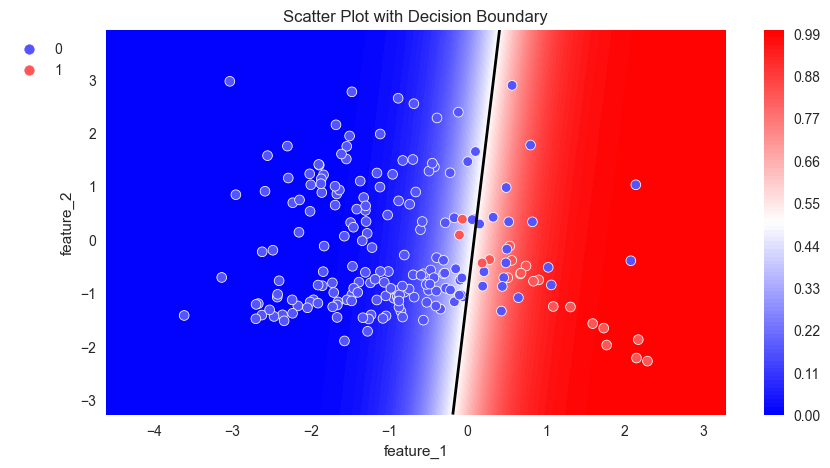

In [42]:
plot_probabilities_2d(Xd, yd, log_reg_balanced)

Угол увеличился, выхваченных объектов класса 1 стало больше, однако в красной зоне оказалось едва ли не столько же объектов класса 0.

###  ВЫБОР ПОРОГА ВЕРОЯТНОСТИ. PR-КРИВАЯ

**PR-кривая (precision-recall curve)** — это график зависимости precision от recall при различных значениях порога вероятности.

Перед построением PR-кривой нам необходимо предсказать вероятности принадлежности к классу 1 на валидационных фолдах кросс-валидации.

Для предсказания вероятностей используем функцию cross_val_predict(). Данная функция выполняет кросс-валидацию и возвращает предсказания для валидационных фолдов. Если ей передать параметр method='predict_proba', она вернёт предсказанные вероятности для каждого из классов на всех фолдах. Остальные параметры аналогичны параметрам функции cross_validate().

In [43]:
# Создаём модель.
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42 # генератор случайных чисел 
)
# Обучаем модель
model.fit(X_train, y_train)
# Создаём кросс-валидатор k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
# Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(
    model, X_train, y_train, cv=skf, method='predict_proba'
)

In [44]:
y_cv_proba_pred

array([[0.        , 1.        ],
       [0.24561404, 0.75438596],
       [1.        , 0.        ],
       ...,
       [0.60621762, 0.39378238],
       [1.        , 0.        ],
       [0.03030303, 0.96969697]])

In [45]:
# Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]

Теперь мы можем построить PR-кривую. Для этого воспользуемся функций precision_recall_curve() из модуля metrics библиотеки sklearn. В данную функцию нужно передать истинные метки классов и предсказанные вероятности. Взамен она вернёт три массива: значения метрик precision и recall, вычисленных на различных порогах вероятности, и сами пороги вероятности:

In [46]:
# Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.         0.02739726 0.02898551 0.05       0.07407407]
Precision scores: [0.39007634 0.50050659 0.50357873 0.50437919 0.5043837 ]
Recall scores: [1.         0.9667319  0.96379648 0.95792564 0.95694716]


Осталось дело за малым. Вычислим значение $F_1$-score при различных порогах вероятности и найдём такой порог вероятности, при котором она максимальна. Сделать это можно с помощью функции argmax() из модуля numpy — она возвращает индекс максимального элемента массива.

Далее построим PR-кривую и отметим на ней точку максимума $F_1$-score.

Best threshold = 0.33, F1-Score = 0.69


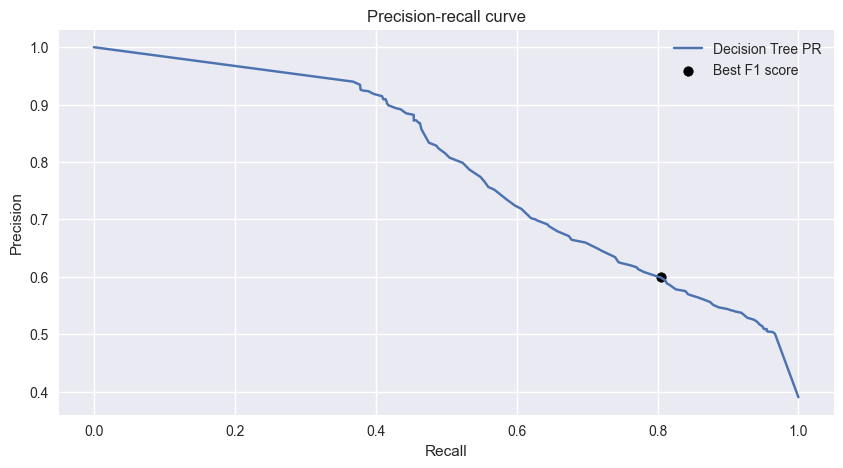

In [47]:
# Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
# Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

# Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) # фигура + координатная плоскость
# Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
# Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
# Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
# Отображаем легенду
ax.legend();

Итак, согласно нашим вычислениям и построенной PR-кривой, максимум $F_1$ (0.69) на кросс-валидации наблюдается при пороге вероятности 0.33.

Сделаем предсказание классов с таким порогом для всех объектов из отложенной валидационной выборки и выведем отчёт о метриках:

In [48]:
# Задаём оптимальный порог вероятностей
threshold_opt = 0.33
# Образцы воды, для которых вероятность быть пригодными для питья
# > threshold_opt, относим к классу 1
# В противном случае — к классу 0
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
# Считаем метрики
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       400
           1       0.62      0.76      0.68       256

    accuracy                           0.73       656
   macro avg       0.72      0.73      0.72       656
weighted avg       0.74      0.73      0.73       656



Итак, при применении метода подбора вероятности увеличилось значение метрик *recall* и $F_1$ для класса 1. Нам удалось сократить разницу метрик между классами и заставить модель практически одинаково хорошо предсказывать классы питьевой и непитьевой воды.

Чтобы вычислить площадь под PR-кривой, используется функция auc() из модуля metrics библиотеки sklearn. В данную функцию нужно передать значения метрик recall и precision при различных порогах вероятности:

In [49]:
print('PR AUC: {:.2f}'.format(metrics.auc(recall, precision)))

PR AUC: 0.79


###  СЭМПЛИРОВАНИЕ

Следующий подход работы в условиях дисбаланса классов, который мы рассмотрим, — сэмплирование, а точнее — пересэмплирование (oversampling). Идея очень проста: если у нас мало наблюдений миноритарного класса, следует искусственно увеличить их количество.

Все алгоритмы пересэмплирования находятся в модуле over_sampling библиотеки imblearn. Импортируем оттуда алгоритм SMOTE:

In [52]:
from imblearn.over_sampling import SMOTE

Создадим объект класса SMOTE и вызовем у него метод fit_resample(), передав в него обучающую выборку (X_train, y_train). Затем выведем количество наблюдений каждого из классов до и после сэмплирования:

In [53]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

print('Train shape before oversampling:', X_train.shape) 
print('Class balance before oversampling: \n', y_train.value_counts(), sep='')
print('-'*40)
print('Train shape after oversampling:', X_train_s.shape)
print('Class balance after oversampling: \n', y_train_s.value_counts(), sep='')

Train shape before oversampling: (2620, 9)
Class balance before oversampling: 
0    1598
1    1022
Name: Potability, dtype: int64
----------------------------------------
Train shape after oversampling: (3196, 9)
Class balance after oversampling: 
0    1598
1    1598
Name: Potability, dtype: int64


Итак, размер выборки увеличился с 2 620 примеров до 3 196, и теперь количество наблюдений каждого из классов одинаково (1 598/1 598).

Попробуем обучить нашу модель на сгенерированных обучающих данных и сделать предсказание на валидационной выборке, чтобы рассчитать метрики:

In [54]:
# Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    random_state=42, # генератор случайных чисел
)
# Обучаем модель на тренировочной выборке (с сэмплированием)
model.fit(X_train_s, y_train_s)
# Делаем предсказание для каждой из выборок
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
# Выводим значения метрик    
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76       400
           1       0.63      0.78      0.69       256

    accuracy                           0.73       656
   macro avg       0.73      0.74      0.73       656
weighted avg       0.75      0.73      0.73       656



Нам удалось поднять метрики для класса 1 на валидационной выборке и снова найти баланс между метриками классов. Однако мы потеряли в метриках для класса 0.

### Пример

Сбалансируем тренировочную выборку с помощью алгоритма SMOTE. Переобучим теперь модель логистической регрессии на пересэмплированной тренировочной выборке. Все параметры оставим по умолчанию, сделаем предсказание для валидационной выборки и рассчитаем метрики классификации.

In [55]:
Xd_train_s, yd_train_s = sm.fit_resample(Xd_train, yd_train)

# Создаем объект класса логистическая регрессия
log_reg_smpl = linear_model.LogisticRegression(random_state=42)
# Обучаем модель
log_reg_smpl.fit(Xd_train_s, yd_train_s)
# Делаем предсказание
yd_valid_pred_smpl = log_reg_smpl.predict(Xd_valid)
# Вывод отчет о метриках классификации
print(metrics.classification_report(yd_valid, yd_valid_pred_smpl))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.43      0.75      0.55         4

    accuracy                           0.88        40
   macro avg       0.70      0.82      0.74        40
weighted avg       0.92      0.88      0.89        40



*recall* остался прежним, но все остальные заметно поднялись.

Визуализируем разделяющую поверхность логистической регрессии со сбалансированными весами классов.

D:\programm\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


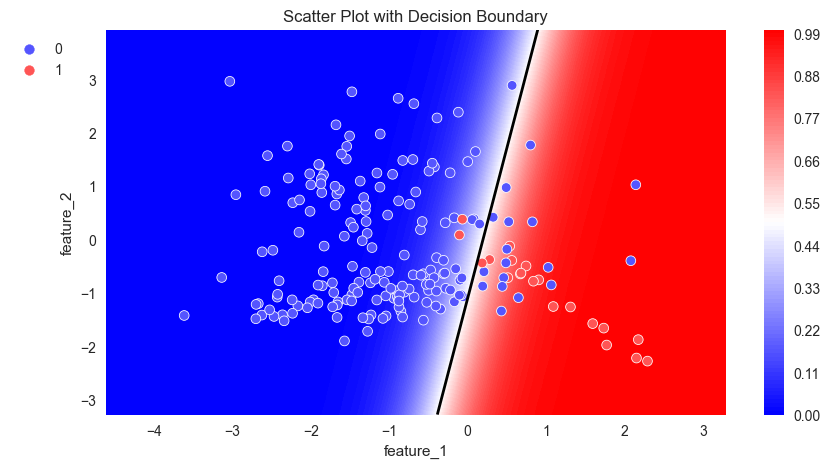

In [56]:
plot_probabilities_2d(Xd, yd, log_reg_smpl)

Угол чуть уменьшился и граница будто малость сдвинулась влево. Теперь в красной зоне объектов класса 0 стало меньше.

## <center> ПЕРЕОБУЧЕНИЕ

Если качество на валидационной выборке стабильно хуже качества на тренировочной, то это явный признак переобучения.

Рассмотрим пример. Будем использовать тот же набор данных об образцах воды.

Сначала проверим модель на переобучение с помощью отложенной (hold-out) выборки.

Для этого стратифицированно разобьём набор данных на тренировочную и валидационную выборки в соотношении 80/20 и обучим дерево решений с энтропией  в качестве критерия информативности и сбалансированными весами классов без ограничения его глубины и количества объектов в листе. Сделаем предсказание для каждой из выборок и рассчитаем метрику $F_1$-score:

In [57]:
# Создаём модель
model_bad = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    class_weight='balanced', # веса классов
    random_state=42 # генератор случайных чисел
)
# Обучаем модель на тренировочной выборке
model_bad.fit(X_train, y_train)
# Делаем предсказание для каждой из выборок
y_train_pred = model_bad.predict(X_train)
y_valid_pred = model_bad.predict(X_valid)
# Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
# Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.f1_score(y_valid, y_valid_pred)))

Train F1 score: 1.00
Valid F1 score: 0.67


Значение $F_1$-score на тренировочной выборке показывает, что задача классификации образцов воды на пригодные и непригодные для питья решена идеально. Метрика равна максимуму — 1, а значит, и precision и recall для каждого из классов равны 1 (значит, и значения всех остальных метрик тоже максимальны). То есть модель правильно определила класс для всех образцов воды из набора данных.

Однако значение $F_1$-score, полученное на валидационной выборке, менее оптимистично. Значение метрики на контроле значительно ниже, чем при обучении.

Это типичная картина переобучения: модель дерева решений полностью адаптировалась под обучающий набор данных, но не нашла общих закономерностей, поэтому результаты на контроле оставляют желать лучшего.

Проверим гипотезу о наличии переобучения у нашего дерева с помощью кросс-валидации k-fold. Организуем стратифицированную кросс-валидацию на пяти фолдах. На каждом шаге кросс-валидации будем вычислять метрику $F_1$ на тренировочных и валидационных фолдах.

In [58]:
# Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
# Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model_bad, # модель
    X=X, # матрица наблюдений X
    y=y, # вектор ответов y
    cv=skf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

{'fit_time': array([0.02204633, 0.0189991 , 0.0220437 , 0.01900625, 0.01896214]),
 'score_time': array([0.00199962, 0.00099969, 0.00099325, 0.00099874, 0.00200105]),
 'test_score': array([0.61445783, 0.68421053, 0.62332696, 0.63276836, 0.70119522]),
 'train_score': array([1., 1., 1., 1., 1.])}

В полученном словаре невооруженным глазом видно, что на тренировочных фолдах значения метрик равны 1, а вот на валидационных метрика ни разу не превысила значения 0.7.

Подсчитаем среднее значение $F_1$-score на выборках:

In [59]:
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


### Пример

Сгенерируем данные для задачи классификации и отрисуем диаграмму рассеяния с цветовой группировкой по классам.

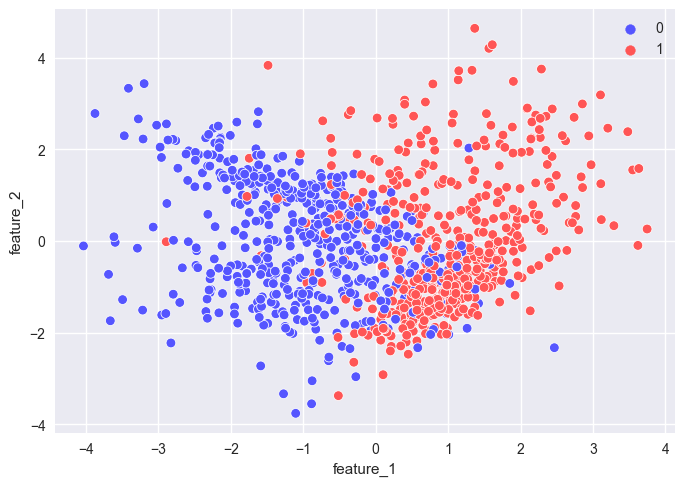

In [60]:
from sklearn import datasets
Xq, yq = datasets.make_classification(
    n_samples=1000, # количество объектов
    n_features=2, # количество признаков
    n_informative=2, # количество информативных признаков
    n_redundant=0, # количество неинформативных признаков
    n_classes=2, # количество классов
    n_clusters_per_class=2, # количество кластеров внутри класса
    random_state=1 # генератор случайных чисел
)
Xq = pd.DataFrame(Xq, columns=['feature_1', 'feature_2'])
yq = pd.Series(yq)
sns.scatterplot(x=Xq['feature_1'], y=Xq['feature_2'], hue=yq, palette='seismic');

Разделим исходный набор данных на тренировочную и валидационную выборки в соотношении 70/30, используя функцию train_test_split(). В качестве значения параметра random_state возьмите число 42.

Обучим модель дерева решений с глубиной 10 (остальные параметры оставим по умолчанию) для решения задачи классификации на тренировочной выборке. Сделаем предсказания для тренировочной и валидационной выборок и рассчитаем метрику *accuracy*.

In [62]:
Xq_train, Xq_valid, yq_train, yq_valid = model_selection.train_test_split(
    Xq, yq, stratify=yq, test_size=0.3, random_state=42
)

q_tree_model = tree.DecisionTreeClassifier(
    max_depth=10, # максимальная глубина
)
# Обучаем модель на тренировочной выборке
q_tree_model.fit(Xq_train, yq_train)
# Делаем предсказание для каждой из выборок
yq_train_pred = q_tree_model.predict(Xq_train)
yq_valid_pred = q_tree_model.predict(Xq_valid)
# Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.accuracy_score(yq_train, yq_train_pred)))
# Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.accuracy_score(yq_valid, yq_valid_pred)))

Train F1 score: 0.98
Valid F1 score: 0.82


Получилось подозрительно хорошо. Воспользуемся функцией plot_probabilities_2d() и построим разделяющую поверхность обученного дерева решений.

D:\programm\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


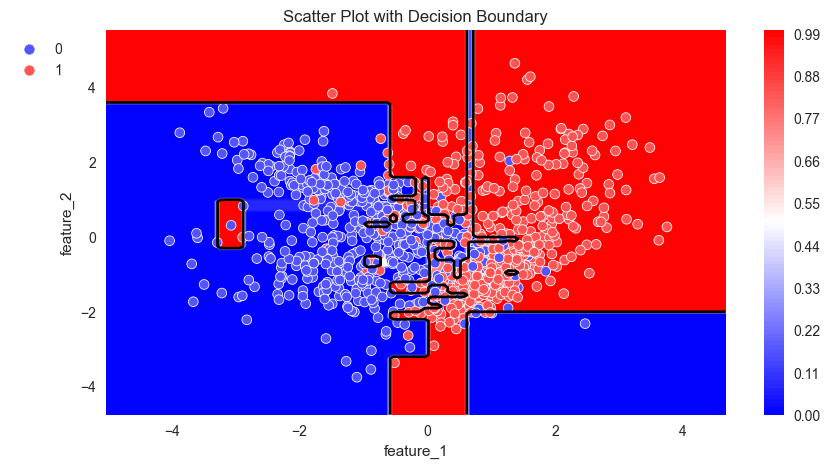

In [63]:
plot_probabilities_2d(Xq, yq, q_tree_model)

Да, так и выглядит переобучение на дереве решений.

## <center> МЕТОДЫ БОРЬБЫ С ПЕРЕОБУЧЕНИЕМ

Мы посмотрели как с помощью методов валидации можно определить наличие переобучения. Но как с ним бороться?

Существует несколько основных способов. Ключевая идея, заложенная в каждом из методов, звучит так: снизить переобучение = уменьшить разброс (вариативность) ошибки модели:
 * уменьшение сложности модели;
 * регуляризация;
 * манипуляции с данными: увеличить или уменьшить количество примеров, на которых обучается модель.

Сначала необходимо разобраться в причине переобучения модели. Для дерева решений установленный по умолчанию параметр max_depth будет означать, что дерево будет делиться до тех пор, пока не определит правильный класс для каждого объекта из обучающего набора данных.

На реальных данных, подверженных зашумлённости, такой подход в большинстве случаев приводит к переобучению дерева: глубина становится очень большой, и дерево не отражает общих зависимостей в данных.

В таком случае в первую очередь прибегают к «обрезке» деревьев путём ограничения максимальной глубины и/или увеличения количества объектов, при которых вершина дерева превращается в лист и деление прекращается.

Для начала посмотрим на текущую глубину дерева:

In [64]:
print('Current depth:', model_bad.get_depth())

Current depth: 27


Дерево глубиной 27 — это очень сложная модель. Давайте попробуем её упростить, добавив в дерево решений ограничение на глубину (max_depth). Пусть максимальная глубина дерева будет равна 7.

In [72]:
# Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # ограничиваем глубину дерева
    random_state=42, # генератор случайных чисел
    class_weight='balanced' # веса классов
)
 
# Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
# Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, # модель
    X=X, # матрица наблюдений X
    y=y, # вектор ответов y
    cv=skf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.75
Valid k-fold mean f1: 0.66


После ограничения максимальной глубины удалось уменьшить разницу между метриками на тренировочных и валидационных фолдах кросс-валидации.

Попробуем добавить ещё одно ограничение к нашему дереву: увеличим количество объектов, которых достаточно для образования листа дерева (min_samples_leaf). По умолчанию этот параметр равен 1.

In [83]:
# Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # ограничиваем глубину дерева
    min_samples_leaf=5, # увеличиваем количество объектов в листе
    random_state=42, # генератор случайных чисел
    class_weight='balanced' # веса классов
)
 
# Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
# Считаем метрики на кросс-валидации k-fold со стратификацией
cv_metrics = model_selection.cross_validate(
    estimator=model, # модель
    X=X, # матрица наблюдений X
    y=y, # вектор ответов y
    cv=skf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
 
print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1: 0.74
Valid k-fold mean f1: 0.66


Нам удалось ещё немного сократить разницу между метриками на тренировочных и валидационных фолдах и уменьшить переобучение.

### Пример

Переобучим модель дерева решений с глубиной 3 (остальные параметры оставим по умолчанию) для решения задачи классификации на тренировочной выборке. Сделаем предсказания для тренировочной и валидационной выборок и рассчитаем метрику *accuracy*.

In [84]:
q_tree_model = tree.DecisionTreeClassifier(
    max_depth=3, # максимальная глубина
)
# Обучаем модель на тренировочной выборке
q_tree_model.fit(Xq_train, yq_train)
# Делаем предсказание для каждой из выборок
yq_train_pred = q_tree_model.predict(Xq_train)
yq_valid_pred = q_tree_model.predict(Xq_valid)
# Выводим значения метрик для тренировочной выборки
print('Train F1 score: {:.2f}'.format(metrics.accuracy_score(yq_train, yq_train_pred)))
# Выводим значения метрик для валидационной выборки
print('Valid F1 score: {:.2f}'.format(metrics.accuracy_score(yq_valid, yq_valid_pred)))

Train F1 score: 0.88
Valid F1 score: 0.85


Значения метрики для обеих выборок почти равны. Снова воспользуемся функцией plot_probabilities_2d() и построим разделяющую поверхность обученного дерева решений.

D:\programm\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


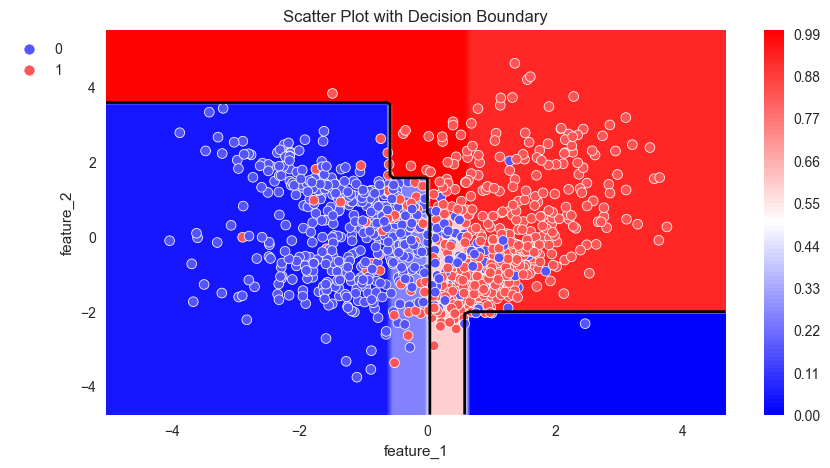

In [85]:
plot_probabilities_2d(Xq, yq, q_tree_model)

Кажется, нам удалось избавиться от переобучения.

## <center> ПОСТРОЕНИЕ КРИВОЙ ОБУЧЕНИЯ

**Кривая обучения (learning curve)** — это график зависимости некоторой метрики на обучающем (валидационном) наборе данных от количества объектов, которые участвуют в обучении модели.

 * Основное назначение кривых обучения — **мониторинг изменения метрики в процессе поступления новых данных**. Благодаря этому мы можем найти такой размер данных, начиная с которого обогащение набора данных новыми наблюдениями не приносит значительного эффекта.

 * Благодаря кривым обучения мы можем **отслеживать недообучение и переобучение модели**.
    
 * Кривые обучения позволяют **визуально сравнить качество различных моделей**.

In [86]:
# Создаём модель
model = tree.DecisionTreeClassifier(
    criterion='entropy', # критерий информативности
    max_depth=7, # максимальная глубина
    min_samples_leaf=5, # минимальное число объектов в листе
    class_weight='balanced', 
    random_state=42, # генератор случайных чисел 
)
 
# Создаём объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
 
# Вычисляем координаты для построения кривой обучения
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    estimator = model, # модель
    X = X, # матрица наблюдений X
    y = y, # вектор ответов y
    cv = skf, # кросс-валидатор
    scoring = 'f1' # метрика
)
print('Train sizes: \n', train_sizes)
print('Train scores: \n', train_scores)
print('Valid scores: \n', valid_scores)

Train sizes: 
 [ 262  851 1441 2030 2620]
Train scores: 
 [[0.8        0.72727273 0.72727273 0.72727273 0.72727273]
 [0.76156584 0.82522523 0.8757764  0.8757764  0.8757764 ]
 [0.78546099 0.80108011 0.78497653 0.78183613 0.78183613]
 [0.75440806 0.74526573 0.72822528 0.76443265 0.75997384]
 [0.73336393 0.75992939 0.72322275 0.74051593 0.76085963]]
Valid scores: 
 [[0.62222222 0.2228739  0.18128655 0.25329815 0.28486647]
 [0.64528302 0.4978903  0.46031746 0.53831776 0.56928839]
 [0.59622642 0.60687023 0.60805861 0.56624319 0.60820896]
 [0.60903733 0.68641115 0.63859649 0.59344894 0.67407407]
 [0.61981982 0.6797153  0.66294227 0.61689587 0.71719039]]


Для того чтобы вычислить среднюю кросс-валидационную метрику на каждом из наборов данных, необходимо рассчитать среднее по столбцам матриц train_scores и valid_scores:

In [87]:
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
 
print('Train k-fold f1 scores',  train_scores_mean)
print('Valid k-fold f1 scores',  valid_scores_mean)

Train k-fold f1 scores [0.74181818 0.84282405 0.78703798 0.75046111 0.74357833]
Valid k-fold f1 scores [0.31290946 0.54221938 0.59712148 0.6403136  0.65931273]


Теперь можно построить графики кривых обучения:

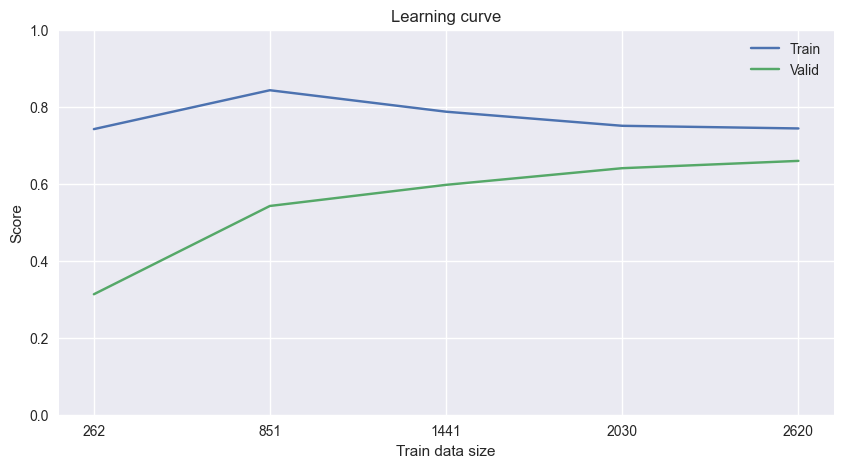

In [88]:
# Визуализируем кривую обучения
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
# Строим кривую обучения по метрикам на тренировочных фолдах
ax.plot(train_sizes, train_scores_mean, label='Train')
# Строим кривую обучения по метрикам на валидационных фолдах
ax.plot(train_sizes, valid_scores_mean, label='Valid')
# Даём название графику и подписи осям
ax.set_title('Learning curve')
ax.set_xlabel('Train data size')
ax.set_ylabel('Score')
# Устанавливаем отметки по оси абсцисс
ax.xaxis.set_ticks(train_sizes)
# Устаналиваем диапазон оси ординат
ax.set_ylim(0, 1)
# Отображаем легенду
ax.legend();

Видно, что в процессе увеличения количества наблюдений в обучающем наборе данных, метрики на тренировочной и валидационной выборках постепенно приближаются друг к другу, то есть уменьшается разброс (variance).

На финальном этапе, при использовании всех 2 620 наблюдений из обучающей выборки, разница в показателях между тренировочной и валидационной выборками всё ещё присутствует, однако эту разницу можно принять как случайную.

Для удобства дальнейшего использования описанных выше действий для построения кривой обучения давайте обернём их в функцию plot_learning_curve(). У функции будет несколько аргументов: модель, набор данных (X, y), кросс-валидатор, метрика, координатная плоскость matplotlib, на которой будет строиться график, и подпись графика:

In [89]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

Теперь, когда у нас есть наша функция, давайте построим кривые обучения для нескольких моделей. Будем использовать следующие модели:
  * логистическую регрессию,
  * дерево решений с ограниченной максимальной глубиной и количеством объектов в листе,
  * дерево решений без ограничений.
  
Создадим список, в котором будем хранить эти модели:

In [90]:
#Создаём список из моделей
models = [
    linear_model.LogisticRegression(
        max_iter=1000, # количество итераций на сходимость
        random_state=42, # генератор случайных чисел
        class_weight='balanced' # веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', # критерий информативности
        max_depth=7, # максимальная глубина
        min_samples_leaf=5, # минимальное число объектов в листе
        random_state=42, # генератор случайных чисел 
        class_weight='balanced' # веса классов
    ),
    tree.DecisionTreeClassifier(
        criterion='entropy', # критерий информативности
        random_state=42, # генератор случайных чисел 
        class_weight='balanced' # веса классов
    ),
]

Наконец, построим кривые обучения для каждой из моделей. Для этого заранее создадим k-fold-кросс-валидатор со стратификацией на пять фолдов. Создадим фигуру с тремя координатными плоскостями. Реализуем цикл по составленному списку из моделей и их индексам (они нам понадобятся для отображения на соответствующих координатных плоскостях). Внутри цикла будем вызывать нашу функцию plot_learning_curve():

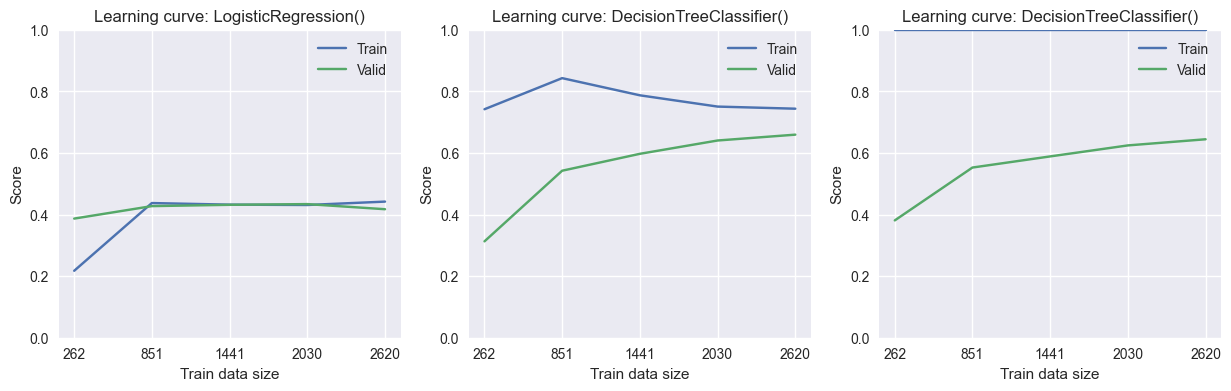

In [91]:
# Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
# Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # фигура + 3 координатных плоскости
# Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): # i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X, y, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)

Благодаря построенным графикам мы можем легко сравнить три представленные модели между собой.

 * **Первый график**, построенный для логистической регрессии, говорит нам о том, что для данной модели качество на тренировочных и валидационных фолдах практически одинаково (кривые проходят очень близко друг к другу), то есть переобучения нет. Однако данная модель обладает низким качеством: кривые не превышают даже значения 0.5. Модель является недообученнной.
 * **Третий график**, построенный для дерева решений без ограничений глубины, явно указывает на наличие переобучения: тренировочная кривая всё время находится в области своего максимума — 1, а вот валидационная кривая не может достичь такой высокой отметки.
 * Из всех представленных оптимальной является модель дерева решений с ограничениями, кривая обучения которой изображена на **втором графике**. Тренировочная и валидационная кривые постепенно сходятся к единой отметке качества, и полученная метрика превышает отметку в 0.5.